In [1]:
import pandas as pd
import math as m
import random
import matplotlib.pyplot as plt

In [2]:
datacsv = pd.read_csv('dataset.csv')
data_set = []
for index, row in datacsv.iterrows():
    item = row.values.tolist()
    data_set.append(item)
trainingDataset = data_set[:int(len(data_set)*.70)]
validationDataset = data_set[int(len(data_set)*.70):int(len(data_set)*.85)]
testDataset = data_set[-int(len(data_set)*.15):]

In [3]:
def sigmoid(z):
    return 1 / (1 + m.exp(-z))

In [4]:

def TrainingData(trainingDataset, lr):
    theta = [random.uniform(0,1) for _ in range(len(trainingDataset[0]))]
    history = []
    itr = 0
    while itr <= 500:
        itr += 1
        TJ = 0
        for X in trainingDataset:
            z = sum([t * x for t, x in zip(theta, X[:-1] + [1])])
            if z > 100:
                h = 1
            elif z < -100:
                h = 0
            else:
                h = sigmoid(z)
            y = X[-1]
            h = min(max(h, 1e-15), 1 - 1e-15)
            J = -y * m.log(h) - (1 - y) * m.log(1 - h)
            TJ += J
            dv = [x * (h - y) for x in X[:-1] + [1]]
            theta = [t - (dvi * lr) for t, dvi in zip(theta, dv)]

        TJ /= len(trainingDataset)
        history.append(TJ)

    return theta, history

In [5]:
def Validation(theta):
    correct = 0
    for V in validationDataset:
        z = sum([t*v for t,v in zip(theta,V[:-1] + [1])])
        if z > 100:
            h = 1
        elif z < -100:
            h = 0
        else:
            h = sigmoid(z)
        if h >= 0.5:
            h = 1
        else:
            h = 0
        y = V[-1]
        if h == y:
            correct += 1
    val_acc = (correct*100)/len(validationDataset)
    return val_acc


In [6]:
LearningRate = [0.1, 0.01, 0.001, 0.0001]
max_vRate = 0
for LR in LearningRate:
    theta, train_loss = TrainingData(testDataset,LR)
    vRate = Validation(theta)
    print("Learning Rate :",LR)
    print("Validation Accuracy :",vRate)
    if vRate > max_vRate :
        Rate = LR
        max_vRate = vRate
        loss = train_loss
        bestTheta = theta

Learning Rate : 0.1
Validation Accuracy : 63.47826086956522
Learning Rate : 0.01
Validation Accuracy : 66.08695652173913
Learning Rate : 0.001
Validation Accuracy : 72.17391304347827
Learning Rate : 0.0001
Validation Accuracy : 69.56521739130434


In [7]:
print("Max Validation Accuracy :", max_vRate, "For Learning Rate :", Rate)

Max Validation Accuracy : 72.17391304347827 For Learning Rate : 0.001


In [8]:
# TESTING
correct = 0
for T in testDataset:
    z = sum([t*test for t,test in zip(bestTheta,T[:-1] + [1])])
    if z > 100:
        h = 1
    elif z < -100:
        h = 0
    else:
        h = sigmoid(z)
    if h >= 0.5:
        h = 1
    else:
        h = 0
    y = T[-1]
    if h == y:
        correct += 1
test_acc = (correct*100)/len(testDataset)
print("Test Accuracy :",test_acc)

Test Accuracy : 59.130434782608695


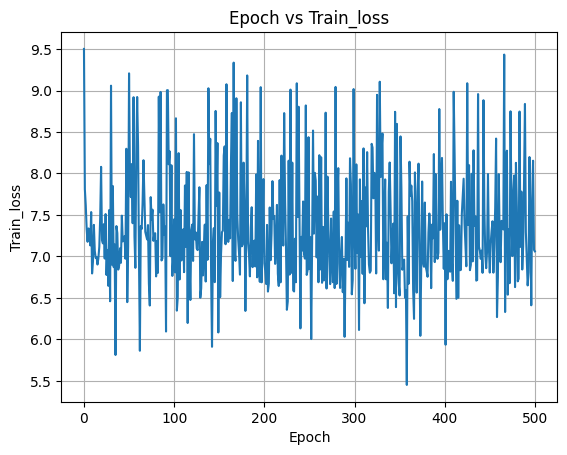

In [9]:
itr = [i for i in range(len(loss))]
plt.plot(itr,loss)
plt.xlabel('Epoch')
plt.ylabel('Train_loss')
plt.title('Epoch vs Train_loss')
plt.grid(True)
plt.show()